# Implement Naive Bayes Classification using income classification dataset from Kaggle.

In [ ]:
#Import dataset and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/adult.csv', header=None, sep=',\s')

<ipython-input-176-3d8cdbea358b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/adult.csv', header=None, sep=',\s')


In [ ]:
#EDA
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
# renaming the column
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# categorical and continuous variables

cat = [col for col in df.columns if df[col].dtypes == 'object']
num = [col for col in df.columns if df[col].dtypes == 'int64']

print(cat)
print(num)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# checking for frequency values

for v in df.columns:
  print(df[v].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [ ]:
# checking for frequency distribution

for v in df.columns:
  print(df[v].value_counts()/np.float64(len(df)))

age
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: count, Length: 73, dtype: float64
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
fnlwgt
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
232784    0.000031
325573    0.000031
140176    0.000031
318264    0.000031
257302    0.000031
Name: count, Length: 21648, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.01984

In [ ]:
# Replace ? for workclass, occupation, native_country
df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [ ]:
df.native_country.value_counts()

,count
native_country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
# replace ? with Nan
df['workclass'].replace('?', np.NAN, inplace=True)
df['occupation'].replace('?', np.NAN, inplace=True)
df['native_country'].replace('?', np.NAN, inplace=True)

<ipython-input-190-74a587aab2ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?', np.NAN, inplace=True)
<ipython-input-190-74a587aab2ac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# now check for missing values again
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
# labels - to check for cardinality(high means worse model might get developed)

for c in cat:
  print(c, ' contains: ', len(df[c].unique()), 'labels')

workclass  contains:  9 labels
education  contains:  16 labels
marital_status  contains:  7 labels
occupation  contains:  15 labels
relationship  contains:  6 labels
race  contains:  5 labels
sex  contains:  2 labels
native_country  contains:  42 labels
income  contains:  2 labels


In [ ]:
# checking for missing values - numerical columns
df[num].isnull().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


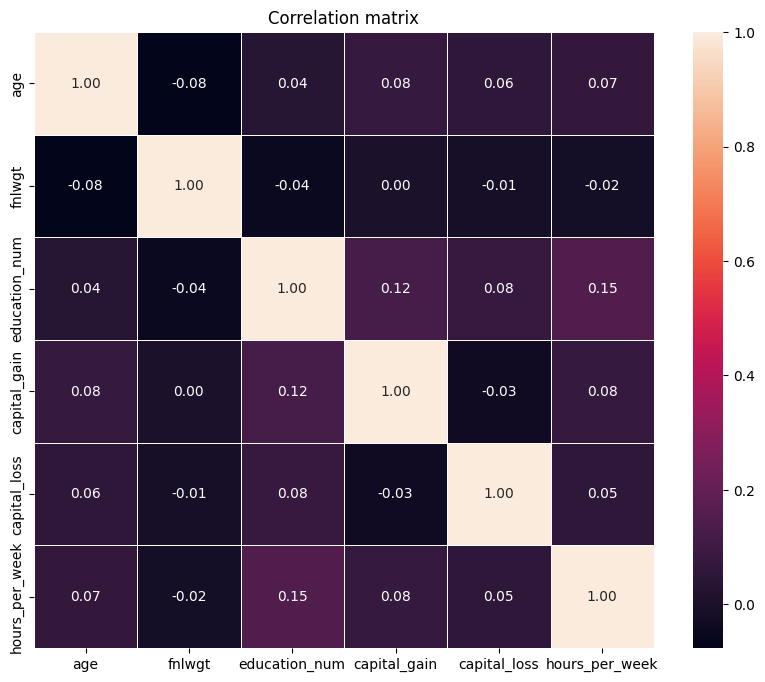

In [ ]:
# correlation matrix

corr_matrix = df[num].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [ ]:
# pre-processing & feature-engineering

X = df.drop('income', axis=1)
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
15282,36,Private,174308,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States
24870,35,Private,198202,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,54,United-States
18822,38,Private,52963,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,50,United-States
26404,50,Private,138270,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,40,United-States
7842,68,Self-emp-not-inc,116903,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2149,40,United-States


In [ ]:
X_train.isnull().sum()

,0
age,0
workclass,1458
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1464
relationship,0
race,0
sex,0


In [ ]:
X_test.isnull().sum()

,0
age,0
workclass,378
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,379
relationship,0
race,0
sex,0


In [ ]:
# column with missing value
missing_col = ['workclass', 'occupation', 'native_country']

In [ ]:
#impute
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train[missing_col] = imputer.fit_transform(X_train[missing_col])
X_test[missing_col] = imputer.transform(X_test[missing_col])

In [ ]:
X_train.shape

(26048, 14)

In [ ]:
X_test.shape

(6513, 14)

In [ ]:
X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#encode
cat_columns = cat[:len(cat)-1]

X_train = pd.get_dummies(X_train, columns=cat_columns)
X_test = pd.get_dummies(X_test, columns=cat_columns)

In [ ]:
# Concatenate X_train and X_test to apply one-hot encoding to both at the same time
X_combined = pd.concat([X_train, X_test], axis=0)

# Apply one-hot encoding to the categorical columns
X_combined_encoded = pd.get_dummies(X_combined, columns=cat_columns, drop_first=False)

# Split the combined dataset back into X_train and X_test
X_train_encoded = X_combined_encoded.iloc[:len(X_train), :]
X_test_encoded = X_combined_encoded.iloc[len(X_train):, :]

In [ ]:
X_train_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
15282,36,174308,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
24870,35,198202,9,0,0,54,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
18822,38,52963,13,0,0,50,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26404,50,138270,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7842,68,116903,11,0,2149,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X_train_encoded.shape

(26048, 105)

In [ ]:
X_test_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
22278,27,177119,10,0,0,44,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8950,27,216481,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7838,25,256263,12,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
16505,46,147640,3,0,1902,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
19140,45,172822,7,0,2824,76,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X_test_encoded.shape

(6513, 105)

In [ ]:
# now scaling for making sure all the variables stay in the same scale

cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_encoded)
X_test = scaler.transform(X_test_encoded)

In [ ]:
cols = X_train_encoded.columns
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-0.052632,-0.030971,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.105263,0.169550,-0.333333,0.0,0.0,2.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,-1.049314,1.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.684211,-0.333407,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.631579,-0.512721,0.333333,0.0,2149.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-0.526316,-0.007381,0.000000,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.526316,0.322950,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.631579,0.656806,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.473684,-0.254772,-2.333333,0.0,1902.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.421053,-0.043442,-1.000000,0.0,2824.0,7.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# implement model

from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gaus.predict(X_test)

In [ ]:
# check accuracy score

from sklearn.metrics import accuracy_score
print("Gaussian model - accuracy score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Gaussian model - accuracy score: 0.800


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gaus.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gaus.score(X_test, y_test)))

Training set score: 0.8074
Test set score: 0.8004


In [ ]:
# for null-accuracy
# check class distribution in test set
y_test.value_counts()

# check null accuracy score
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {:.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3937  981]
 [ 319 1276]]


In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4918
        >50K       0.57      0.80      0.66      1595

    accuracy                           0.80      6513
   macro avg       0.75      0.80      0.76      6513
weighted avg       0.84      0.80      0.81      6513

